In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('tweet-data.csv', encoding='latin-1', header=None)

# Assign column names
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']


In [2]:
data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
data.describe()

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
data.shape

(1600000, 6)

In [6]:
data.dtypes

sentiment     int64
id            int64
date         object
query        object
user         object
text         object
dtype: object

In [7]:
data.isnull().sum()

sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

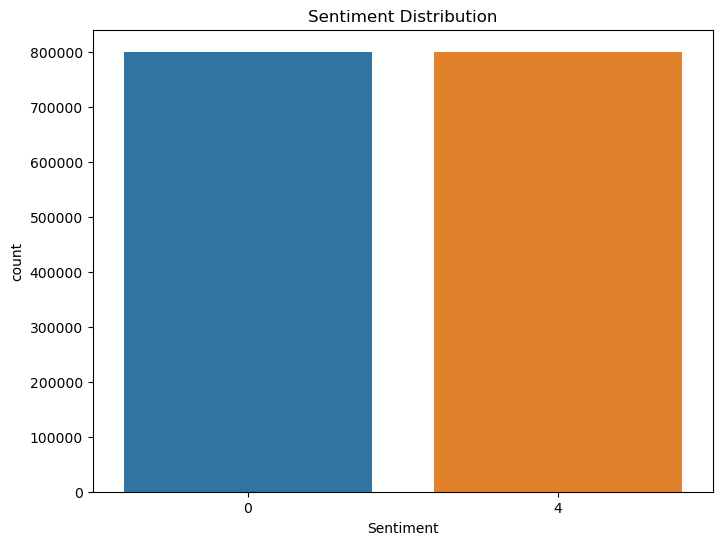

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='sentiment')
plt.title("Sentiment Distribution")
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

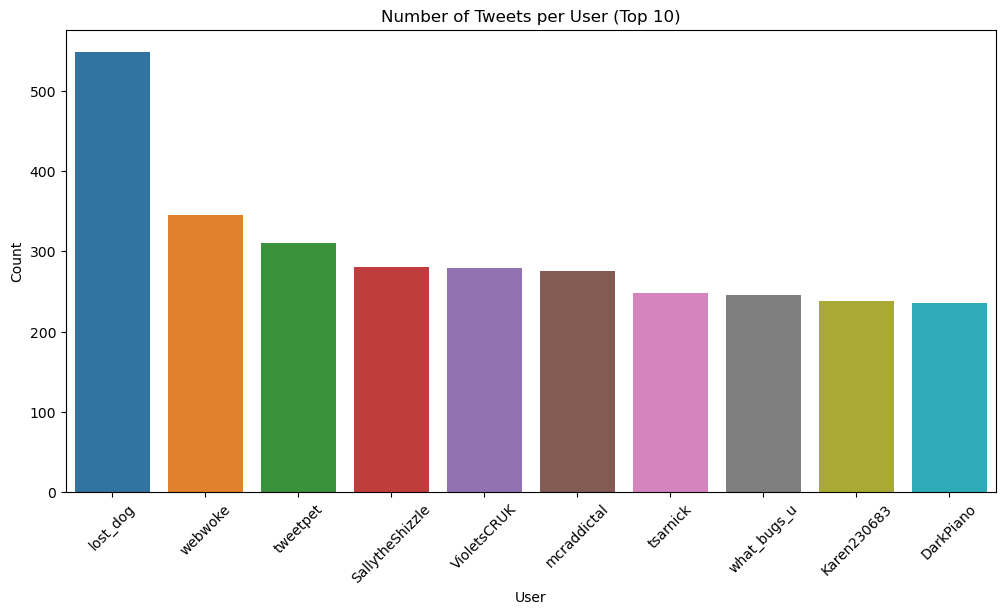

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='user', order=data['user'].value_counts().index[:10])
plt.title("Number of Tweets per User (Top 10)")
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


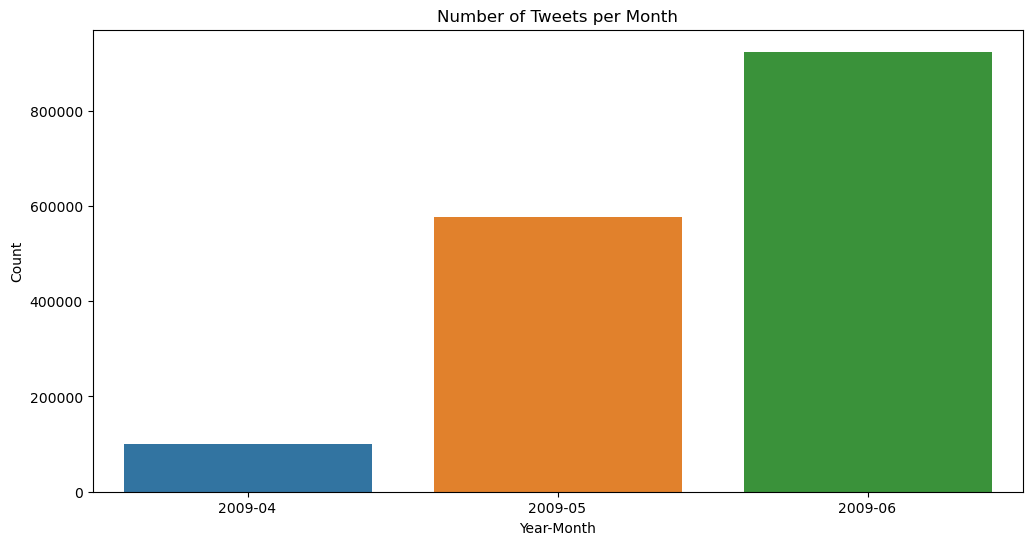

In [10]:
plt.figure(figsize=(12,6))
data['date'] = pd.to_datetime(data['date'])
data['year_month'] = data['date'].dt.to_period('M')
sns.countplot(data=data, x='year_month', order=data['year_month'].value_counts().index.sort_values())
plt.title("Number of Tweets per Month")
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [12]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [
        token for token in tokens if token not in stop_words
    ]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    preprocess_text = ' '.join(tokens)
    return preprocess_text

In [13]:
# nltk.download('omw-1.4')

data['preprocess_text'] = data['text'].apply(preprocess_text)

In [ ]:
from collections import Counter

# Combining all the processed texts into a single string
all_text = ' '.join(data['preprocess_text'])

# Tokenizing the combined text
tokens = word_tokenize(all_text)

# Counting the frequency of each word
word_freq = Counter(tokens)

# Getting the most common words and their frequencies
top_words = word_freq.most_common(10)
print(top_words)


In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Initialize the Counter object
word_freq = Counter()

# Tokenize and update word frequencies for each processed text
for text in data['preprocess_text']:
    tokens = word_tokenize(text)
    word_freq.update(tokens)

# Getting the most common words and their frequencies
top_words = word_freq.most_common(10)
print(top_words)



In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict
from multiprocessing import Pool

# Set the number of processes for parallelization
num_processes = 4  # Adjust the number based on your system's capabilities

# Tokenization function for parallel processing
def tokenize_text(text):
    return word_tokenize(text)

# Initialize a defaultdict for word frequencies
word_freq = defaultdict(int)

# Load the dataset into a Pandas DataFrame

# Preprocess and tokenize the text in parallel
with Pool(num_processes) as pool:
    tokens = pool.map(tokenize_text, data['text'])

# Update word frequencies
for text_tokens in tokens:
    for token in text_tokens:
        word_freq[token] += 1

# Get the most common words and their frequencies
top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_words)


In [ ]:
is_downloaded = nltk.data.find('omw-1.4')

if is_downloaded:
    print("Package 'punkt' is downloaded.")
else:
    print("Package 'punkt' is not downloaded.")

In [ ]:
# Assuming you have a sentiment analysis library like TextBlob installed
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Applying sentiment analysis to the 'processed_text' column
df['sentiment_polarity'] = df['processed_text'].apply(get_sentiment)

# Visualizing the sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sentiment_polarity', bins=20, kde=True, color='purple', alpha=0.7)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()


In [ ]:
import re

# Extracting hashtags from the 'text' column
hashtags = data['text'].apply(lambda x: re.findall(r'\#\w+', x)).explode()

# Counting the frequency of each hashtag
hashtag_freq = hashtags.value_counts()

# Getting the most common hashtags and their frequencies
top_hashtags = hashtag_freq.head(10)
print(top_hashtags)


In [ ]:
# Extracting user mentions from the 'text' column
user_mentions = data['text'].apply(lambda x: re.findall(r'\@\w+', x)).explode()

# Counting the frequency of each user mention
user_mention_freq = user_mentions.value_counts()

# Getting the most common user mentions and their frequencies
top_user_mentions = user_mention_freq.head(10)
print(top_user_mentions)


In [ ]:
# Visualizing the top hashtags
plt.figure(figsize=(10, 6))
top_hashtags.plot(kind='bar', color='blue')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Visualizing the top user mentions
plt.figure(figsize=(10, 6))
top_user_mentions.plot(kind='bar', color='green')
plt.title('Top 10 User Mentions')
plt.xlabel('User Mention')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
